In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels import api as sm
from sklearn.metrics import log_loss
import numpy as np

In [2]:
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv', index_col='Id')

In [3]:
data =x_train.join(y_train)

In [38]:
data = x_train

In [60]:
data['year of followup']

0        2.699521
1        2.187543
2        2.042437
3        2.028747
4        4.950034
           ...   
99995    4.177960
99996    5.073238
99997    2.017796
99998    2.735113
99999    2.050650
Name: year of followup, Length: 100000, dtype: float64

In [39]:
good_columns = ['Age', 'Gender', 'site', 'height', 'weight', 'Body Mass Index', 'Systolic blood pressure', \
                'diastolic blood pressure', 'Fasting plasma glucose', 'Cholesterol', 'Triglyceride', \
                'High-density lipoprotein cholesterol', 'Low-density lipoprotein cholesterol', 'Alanine aminotransferase', \
                'Aspartate transaminase', 'Blood urea nitrogen', 'Creatinine clearance rate', \
                'Fasting plasma glucose (final visit)', 'censor of diabetes at followup', 'year of followup', \
                'family history of diabetes']

In [40]:
data.isna().sum()/len(data)

Age                                      0.00000
Gender                                   0.00000
site                                     0.00000
height                                   0.00002
weight                                   0.00000
Body Mass Index                          0.00000
Systolic blood pressure                  0.00011
diastolic blood pressure                 0.00012
Fasting plasma glucose                   0.00000
Cholesterol                              0.02257
Triglyceride                             0.02277
High-density lipoprotein cholesterol     0.44444
Low-density lipoprotein cholesterol      0.43884
Alanine aminotransferase                 0.00837
Aspartate transaminase                   0.58247
Blood urea nitrogen                      0.10080
Creatinine clearance rate                0.05200
Fasting plasma glucose (final visit)     0.00009
Diabetes diagnosed during followup       0.99381
censor of diabetes at followup           0.00000
year of followup    

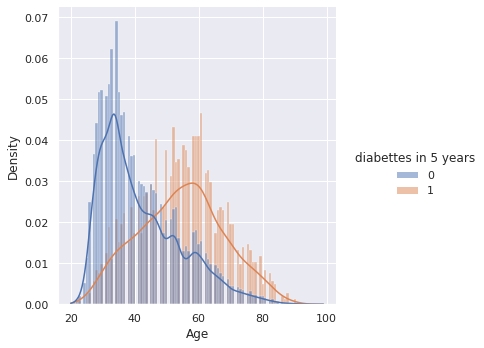

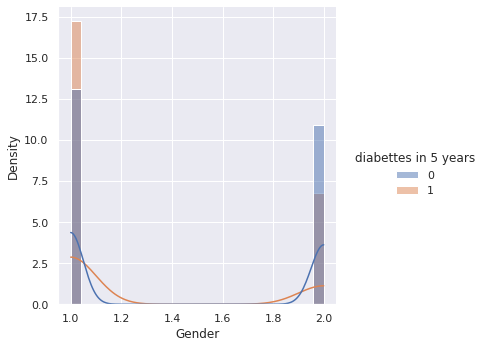

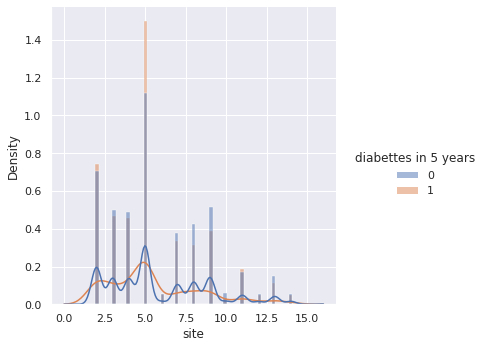

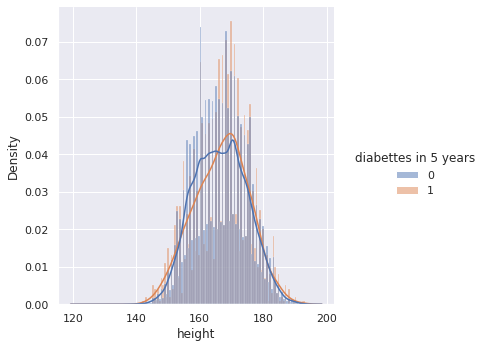

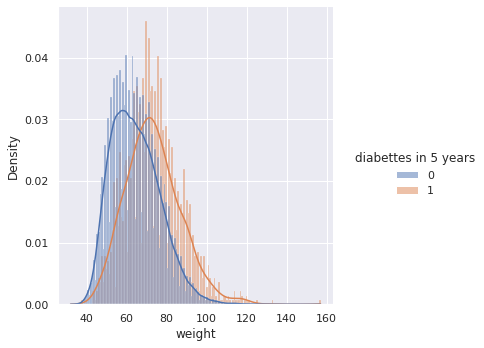

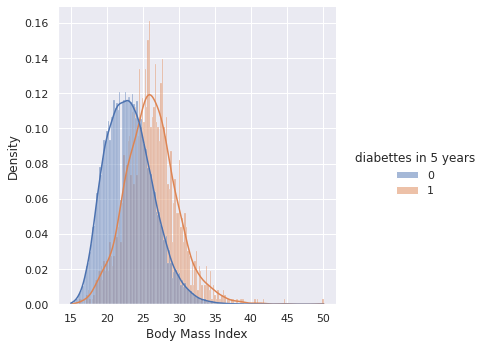

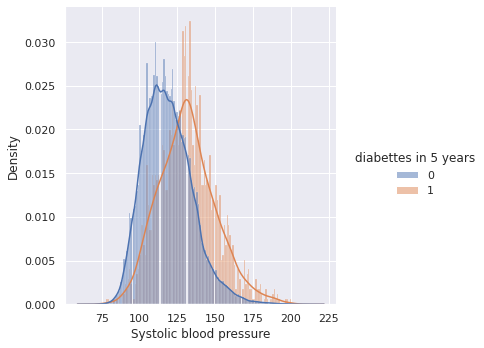

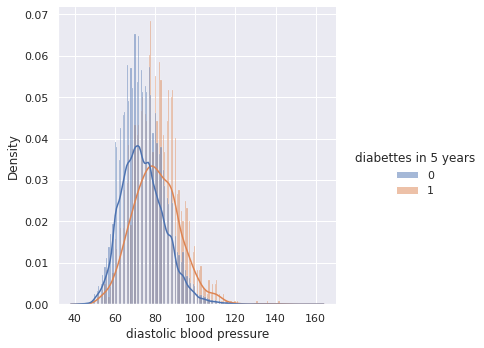

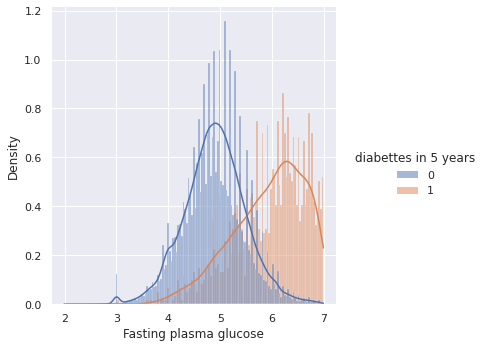

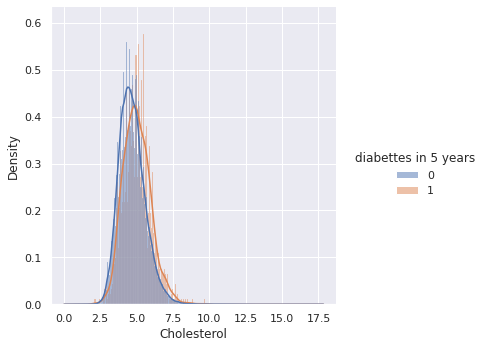

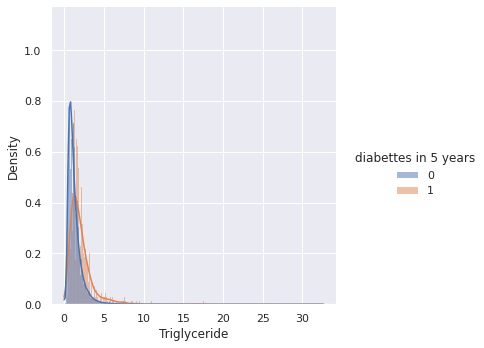

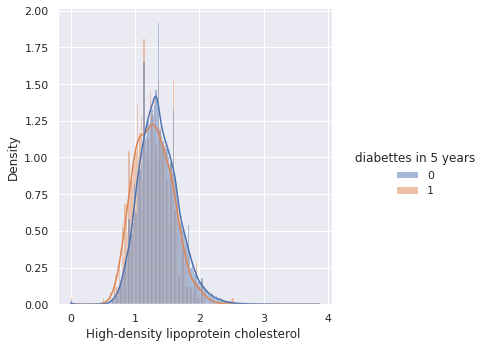

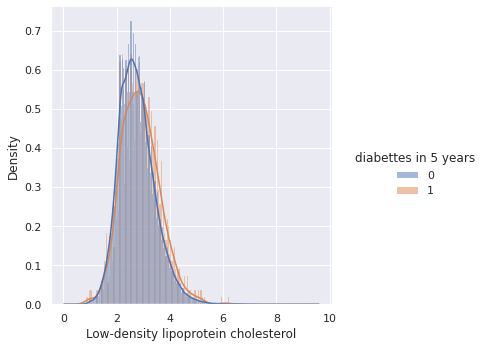

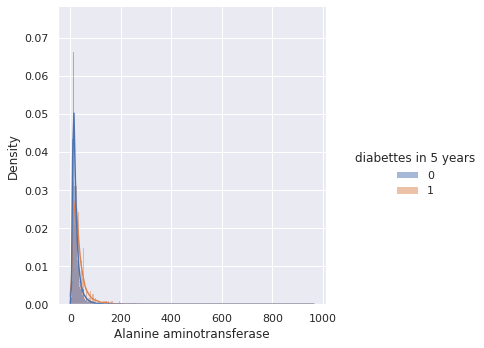

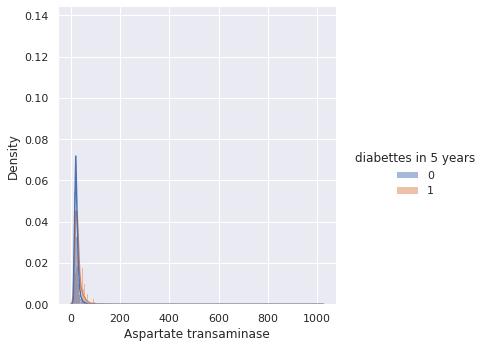

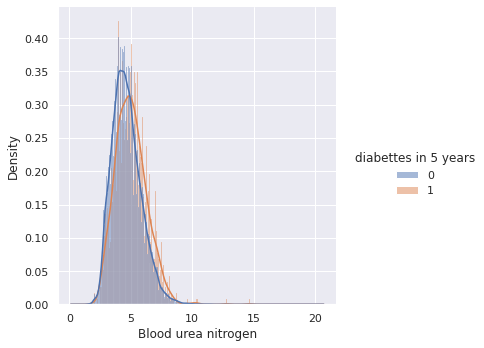

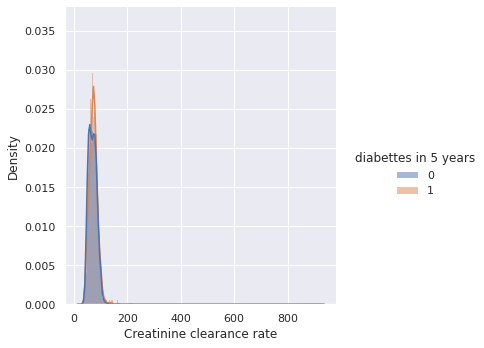

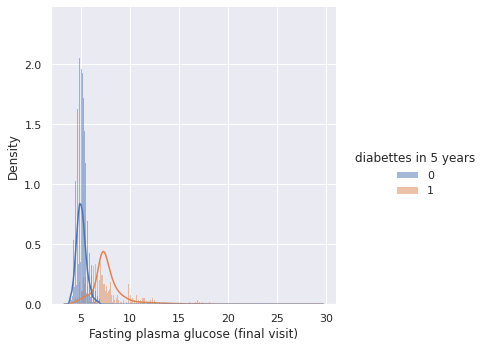

Cound't draw  Diabetes diagnosed during followup


/home/tronindmitr/DAS/SecondSemester/ML/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


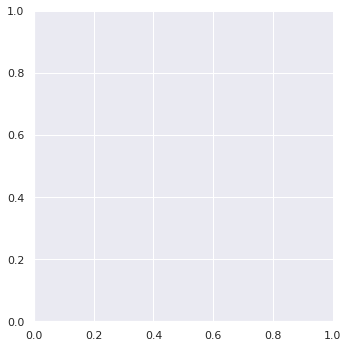

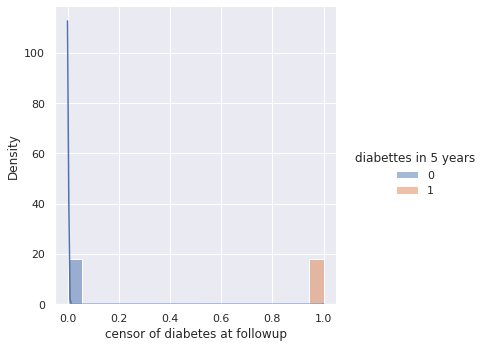

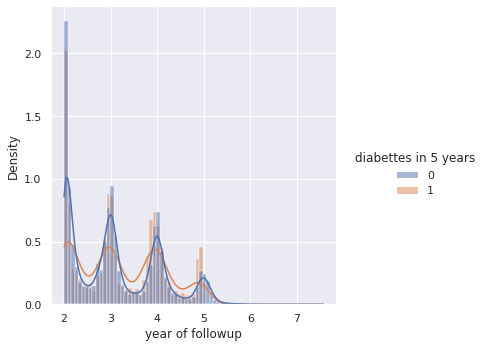

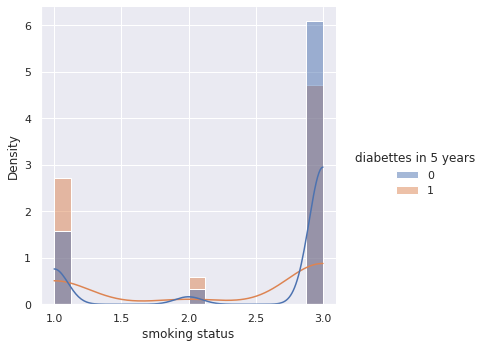

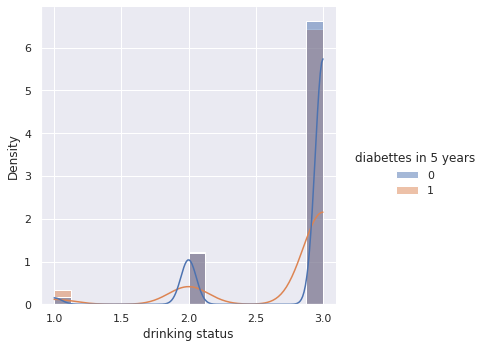

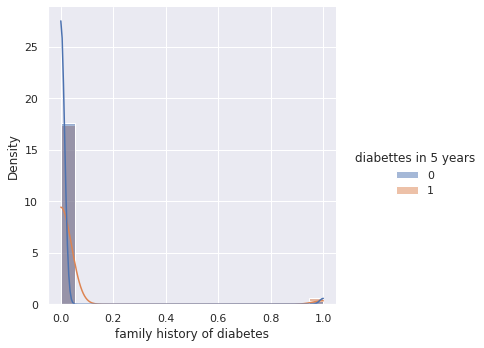

/home/tronindmitr/DAS/SecondSemester/ML/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/tronindmitr/DAS/SecondSemester/ML/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


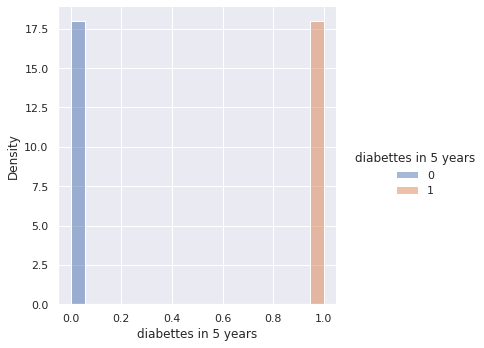

In [60]:
for i in data.columns:
    try:
        sns.displot(data=data, x = i, hue='diabettes in 5 years', kde=True, stat="density", common_norm=False)
        plt.show()
    except:
        print('Cound\'t draw ', i)

In [30]:
col_to_drop = ['site', 'height', 'Cholesterol', 'Triglyceride', 'High-density lipoprotein cholesterol ', \
'Low-density lipoprotein cholesterol', 'Alanine aminotransferase', 'Aspartate transaminase', \
'Blood urea nitrogen', 'Creatinine clearance rate']
only_train_col = ['year of followup', 'Fasting plasma glucose (final visit)', 'censor of diabetes at followup', 
                 'Diabetes diagnosed during followup']

In [31]:
data_droped = data.drop(col_to_drop + only_train_col, axis=1)

In [6]:
data_droped.isna().sum()/len(data_droped)

Age                                     0.00000
Gender                                  0.00000
weight                                  0.00000
Body Mass Index                         0.00000
Systolic blood pressure                 0.00011
diastolic blood pressure                0.00012
Fasting plasma glucose                  0.00000
Fasting plasma glucose (final visit)    0.00009
censor of diabetes at followup          0.00000
year of followup                        0.00000
smoking status                          0.71412
drinking status                         0.71412
family history of diabetes              0.00000
diabettes in 5 years                    0.00000
dtype: float64

In [7]:
data_droped.head(20)

,Age,Gender,weight,Body Mass Index,Systolic blood pressure,diastolic blood pressure,Fasting plasma glucose,Fasting plasma glucose (final visit),censor of diabetes at followup,year of followup,smoking status,drinking status,family history of diabetes,diabettes in 5 years
0,53,1,64.1,24.00,106.0,68.0,4.83,5.23,0,2.699521,3.0,3.0,0,0
1,26,2,68.5,28.10,98.0,68.0,5.12,4.33,0,2.187543,3.0,3.0,0,0
2,40,2,47.0,20.30,111.0,63.0,5.62,4.70,0,2.042437,3.0,3.0,0,0
3,34,1,68.0,21.71,133.0,81.0,4.84,5.69,0,2.028747,NaN,NaN,0,0
4,34,1,68.0,21.50,124.0,84.0,3.73,5.00,0,4.950034,3.0,3.0,0,0
5,37,2,56.0,19.50,112.0,62.0,4.65,4.99,0,4.194387,3.0,3.0,0,0
6,57,1,58.0,21.80,112.0,67.0,4.96,5.10,0,3.915127,NaN,NaN,0,0
7,67,1,80.0,27.68,128.0,74.0,4.90,5.32,0,4.988364,NaN,NaN,0,0
8,32,1,55.0,19.50,122.0,51.0,4.47,4.50,0,4.134155,3.0,3.0,0,0
9,46,1,61.0,23.20,126.0,75.0,5.70,5.50,0,2.162902,NaN,NaN,0,0


In [32]:
data_droped['smoking status'].fillna(3, inplace=True)

In [33]:
data_droped['drinking status'].fillna(3, inplace=True)

In [34]:
data_droped.dropna(inplace=True)

In [35]:
scaled_and_hot = pd.get_dummies(data_droped, columns=['Gender', 'smoking status', 'drinking status'])

In [12]:
scaled_and_hot

,Age,weight,Body Mass Index,Systolic blood pressure,diastolic blood pressure,Fasting plasma glucose,Fasting plasma glucose (final visit),censor of diabetes at followup,year of followup,family history of diabetes,diabettes in 5 years,Gender_1,Gender_2,smoking status_1.0,smoking status_2.0,smoking status_3.0,drinking status_1.0,drinking status_2.0,drinking status_3.0
0,53,64.1,24.00,106.0,68.0,4.83,5.23,0,2.699521,0,0,1,0,0,0,1,0,0,1
1,26,68.5,28.10,98.0,68.0,5.12,4.33,0,2.187543,0,0,0,1,0,0,1,0,0,1
2,40,47.0,20.30,111.0,63.0,5.62,4.70,0,2.042437,0,0,0,1,0,0,1,0,0,1
3,34,68.0,21.71,133.0,81.0,4.84,5.69,0,2.028747,0,0,1,0,0,0,1,0,0,1
4,34,68.0,21.50,124.0,84.0,3.73,5.00,0,4.950034,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,72,57.0,21.90,121.0,87.0,5.90,5.22,0,4.177960,0,0,1,0,0,0,1,0,0,1
99996,51,83.0,26.30,123.0,79.0,4.76,6.30,0,5.073238,0,0,1,0,0,0,1,0,0,1
99997,34,59.9,20.00,89.0,55.0,5.20,4.29,0,2.017796,0,0,1,0,0,0,1,0,0,1
99998,32,96.0,27.50,147.0,104.0,4.77,5.10,0,2.735113,0,0,1,0,0,0,1,0,0,1


In [36]:
data_to_scale = ['Age', 'weight', 'Body Mass Index', 'Systolic blood pressure', 'diastolic blood pressure']

In [37]:
scaler = StandardScaler()
scaler.fit(scaled_and_hot[data_to_scale])
train = scaled_and_hot.copy()
train[data_to_scale] = scaler.transform(scaled_and_hot[data_to_scale])

In [38]:
train

,Age,weight,Body Mass Index,Systolic blood pressure,diastolic blood pressure,Fasting plasma glucose,family history of diabetes,diabettes in 5 years,Gender_1,Gender_2,smoking status_1.0,smoking status_2.0,smoking status_3.0,drinking status_1.0,drinking status_2.0,drinking status_3.0
0,0.861372,-0.050153,0.228091,-0.800807,-0.572593,4.83,0,0,1,0,0,0,1,0,0,1
1,-1.272454,0.309390,1.452822,-1.290128,-0.572593,5.12,0,0,0,1,0,0,1,0,0,1
2,-0.166026,-1.447466,-0.877153,-0.494981,-1.034210,5.62,0,0,0,1,0,0,1,0,0,1
3,-0.640210,0.268532,-0.455966,0.850651,0.627611,4.84,0,0,1,0,0,0,1,0,0,1
4,-0.640210,0.268532,-0.518696,0.300165,0.904582,3.73,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.362953,-0.630324,-0.399210,0.116670,1.181552,5.90,0,0,1,0,0,0,1,0,0,1
99996,0.703310,1.494246,0.915135,0.239000,0.442965,4.76,0,0,1,0,0,0,1,0,0,1
99997,-0.640210,-0.393353,-0.966768,-1.840613,-1.772797,5.20,0,0,1,0,0,0,1,0,0,1
99998,-0.798271,2.556530,1.273593,1.706963,2.751050,4.77,0,0,1,0,0,0,1,0,0,1


In [39]:
test = train.pop('diabettes in 5 years')

In [40]:
train

,Age,weight,Body Mass Index,Systolic blood pressure,diastolic blood pressure,Fasting plasma glucose,family history of diabetes,Gender_1,Gender_2,smoking status_1.0,smoking status_2.0,smoking status_3.0,drinking status_1.0,drinking status_2.0,drinking status_3.0
0,0.861372,-0.050153,0.228091,-0.800807,-0.572593,4.83,0,1,0,0,0,1,0,0,1
1,-1.272454,0.309390,1.452822,-1.290128,-0.572593,5.12,0,0,1,0,0,1,0,0,1
2,-0.166026,-1.447466,-0.877153,-0.494981,-1.034210,5.62,0,0,1,0,0,1,0,0,1
3,-0.640210,0.268532,-0.455966,0.850651,0.627611,4.84,0,1,0,0,0,1,0,0,1
4,-0.640210,0.268532,-0.518696,0.300165,0.904582,3.73,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.362953,-0.630324,-0.399210,0.116670,1.181552,5.90,0,1,0,0,0,1,0,0,1
99996,0.703310,1.494246,0.915135,0.239000,0.442965,4.76,0,1,0,0,0,1,0,0,1
99997,-0.640210,-0.393353,-0.966768,-1.840613,-1.772797,5.20,0,1,0,0,0,1,0,0,1
99998,-0.798271,2.556530,1.273593,1.706963,2.751050,4.77,0,1,0,0,0,1,0,0,1


In [41]:
model = sm.GLM(test, train.astype(np.double), \
               family=sm.families.Binomial(link=sm.genmod.families.links.logit()))

In [42]:
result = model.fit()

In [23]:
y_pred = result.predict(train)

In [24]:
log_loss(test, y_pred)

0.06309619215788666

In [67]:
y_test = pd.read_csv('X_test.csv')

In [43]:
res_droped = y_test.drop(col_to_drop, axis= 1)

In [44]:
res_droped['smoking status'].fillna(3, inplace=True)
res_droped['drinking status'].fillna(3, inplace=True)
res_droped_hot = pd.get_dummies(res_droped, columns=['Gender', 'smoking status', 'drinking status'])

In [45]:
test_y = res_droped_hot.copy()
test_y[data_to_scale] = scaler.transform(res_droped_hot[data_to_scale])

In [46]:
pred = result.predict(test_y)

In [48]:
pred

0         0.001017
1         0.016504
2         0.004071
3         0.004973
4         0.001552
            ...   
111828    0.003482
111829    0.000451
111830    0.010711
111831    0.003887
111832    0.003515
Length: 111833, dtype: float64

In [59]:
data_fraim = pd.DataFrame()
data_fraim['Id'] = test_y.index
data_fraim['Prediction'] = pred

In [60]:
data_fraim

,Id,Prediction
0,0,0.001017
1,1,0.016504
2,2,0.004071
3,3,0.004973
4,4,0.001552
...,...,...
111828,111828,0.003482
111829,111829,0.000451
111830,111830,0.010711
111831,111831,0.003887


In [75]:
data_fraim.to_csv('ans1.csv', index=False, na_rep=0)

In [74]:
data_fraim.isna().sum()

Id             0
Prediction    12
dtype: int64